# Demonstration of Exploration
You'll learn how to load, build and navigate N-dimensional images using a CT image of the human brain. 

This demo is a jupyter notebook, i.e. intended to be run step by step.

Author: Eric Einspänner
<br>
Contributor: Nastaran Takmilhomayouni

First version: 6th of July 2023


Copyright 2023 Clinic of Neuroradiology, Magdeburg, Germany

License: Apache-2.0

## Table of contents
0. [Initial Set-Up for Google Colab](#initial-set-up-for-google-colab)
1. [Initial Set-Up (offline)](#initial-set-up-offline)
2. [Load images](#Load-Images)
3. [Medical Image Metadata](#medical-image-metadata)
    - [Exercise](#Exercise-1)
4. [Plot images](#Plot-Images)
    - [Exercise](#Exercise-2)
5. [Load volumes](#Load-Volumes)
    - [Slice 3D images](#Slice-3D-Images)
    - [Plot other views](#Plot-Other-Views)
    - [Exercise](#Exercise-3)


## Initial Set-Up for Google Colab
<u> Execute these code blocks just in Google Colab! </u>

In [ ]:
!git clone https://github.com/University-Clinic-of-Neuroradiology/python-bootcamp.git

In [5]:
import os
import sys
from google.colab import output
output.enable_custom_widget_manager()

sys.path.insert(0,'/content/python-bootcamp/notebooks/ImageAnalysis')
os.chdir(sys.path[0])

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
%pip install -q ipympl numpy matplotlib pydicom imageio

In [6]:
import numpy as np
import matplotlib.pyplot as plt

import imageio.v2 as imageio
import pydicom
from pydicom.data import get_testdata_file

## Initial Set-Up (offline)

In [7]:
# Make sure figures appears inline and animations works
# Edit this to ""%matplotlib notebook" when using the "classic" jupyter notebook interface
%matplotlib widget

In [1]:
# Initial imports etc
import numpy as np
import matplotlib.pyplot as plt

import imageio.v2 as imageio
import pydicom
from pydicom.data import get_testdata_file

## --- Start notebook ---

In [2]:
#  now we load test data files (CT and MR)
ct_file = get_testdata_file("CT_small.dcm")
mr_file = get_testdata_file("MR_small.dcm")

## Load Images
In this chapter, we'll work with sections of a computed tomography (CT) scan.

To warm up, use the `imageio` package to load a single DICOM image from the scan volume and check out a few of its attributes.

In [3]:
# Load the images
im_ct = imageio.imread(ct_file, progress=True) 

im_mr = imageio.imread(mr_file, progress=True)

`im_ct` and `im_mr` are variables that probably contain data related to images. In programming, when we work with images, we often use variables to store information about them.

So, for example `im_mr` is like a box where we keep all the information about an image. The code helps us understand what kind of box it is and what's inside it, like the image's colors, how big it is, and how the computer stores this information.

The `help()` function in Python is like having a built-in manual or guidebook. When you're unsure how to use something in Python—be it a function, module, class, or method—you can use `help()` to get information and examples on how that thing works.

Let's try it out! Take a closer look at the output and try to understand what the `help()` function gives you.

In [4]:
help(im_mr)

Help on Array in module imageio.core.util object:

class Array(numpy.ndarray)
 |  Array(array, meta=None)
 |  
 |  Array(array, meta=None)
 |  
 |  A subclass of np.ndarray that has a meta attribute. Get the dictionary
 |  that contains the meta data using ``im.meta``. Convert to a plain numpy
 |  array using ``np.asarray(im)``.
 |  
 |  Method resolution order:
 |      Array
 |      numpy.ndarray
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __array_finalize__(self, ob)
 |      So the meta info is maintained when doing calculations with
 |      the array.
 |  
 |  __array_wrap__(self, out, context=None)
 |      So that we return a native numpy array (or scalar) when a
 |      reducting ufunc is applied (such as sum(), std(), etc.)
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(cls, array, meta=None)
 |      Create and return a new object.  See help(type) for accurate signature.
 |  
 |

We are now trying to output some attributes:

In [5]:
# Checking the data type of the image array
print(f'Image type: {type(im_mr)}')

# Displaying statistical information of the image data
print(f'Mean pixel intensity: {im_mr.mean()}')                      # Calculating the mean value of pixel intensities
print(f'Minimum pixel intensity: {im_mr.min()}')                    # Finding the minimum pixel intensity
print(f'Maximum pixel intensity: {im_mr.max()}')                    # Finding the maximum pixel intensity
print(f'Standard deviation of pixel intensities: {im_mr.std()}')    # Calculating the standard deviation of pixel intensities
print(f'Data type of the image array: {im_mr.dtype}')               # Displaying the data type of the image array
print(f'Shape of image array: {im_mr.shape}')                       # Displaying the shape of the image array
print(f'Total number of elements in the array: {im_mr.size}')       # Showing the total number of elements in the array
print(f'Number of dimensions of the array: {im_mr.ndim}')           # Displaying the number of dimensions of the array
print(f'Underlying data of the image array: {im_mr.data}')          # Accessing the underlying data of the image array

Image type: <class 'imageio.core.util.Array'>
Mean pixel intensity: 518.88134765625
Minimum pixel intensity: 127
Maximum pixel intensity: 2145
Standard deviation of pixel intensities: 409.1370987934501
Data type of the image array: int16
Shape of image array: (64, 64)
Total number of elements in the array: 4096
Number of dimensions of the array: 2
Underlying data of the image array: <memory at 0x000001D48A9A8C70>


## Medical Image Metadata
Metadata in medical images encompasses various crucial details, comprising:

- Patient Demographics: This encompasses essential patient information like name, age, sex, and clinical details.
- Acquisition Information: It encompasses technical aspects such as image shape, sampling rates, data type, and modality (like X-Ray, CT, or MRI).

To access and retrieve this metadata, you'll be utilizing `pydicom`. Read and retrieve a dataset stored following the DICOM File Format.

In [6]:
# read the DICOM files
ds_ct = pydicom.dcmread(ct_file)
ds_mr = pydicom.dcmread(mr_file)

# print the DICOM header (metadata)
print(ds_ct)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 192
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.5962.1.1.1.1.1.20040119072730.12322
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.5962.2
(0002, 0013) Implementation Version Name         SH: 'DCTOOL100'
(0002, 0016) Source Application Entity Title     AE: 'CLUNIE1'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: '20040119'
(0008, 0013) Instance Creation Time              TM: '072731'
(0008, 0014) Instance Creator UID                U

Please note: We are not loading `im_ct` and `im_mr`(the image arrays), but the DICOM files consisting of header and image data. 

### Exercise 1
Print and explore the metadata of the MR file.

Try to answer the following questions:
- When was the scan performed?
- From which manufacturer was the device where the scan was performed?
- What was the sex of the patient?

In [14]:
# Write your code here (the solution is below)















In [7]:
### Solution
print(ds_mr)

# Answers:
# 28.06.2004 (see DICOM tag (0008, 0020) Study Date)
# Toshiba (see DICOM tag (0008, 0070) Manufacturer)
# 80.0 (see DICOM tag (0010, 1030) Patient's Weight)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 190
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.5962.1.1.4.1.1.20040826185059.5457
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.5962.2
(0002, 0013) Implementation Version Name         SH: 'DCTOOL100'
(0002, 0016) Source Application Entity Title     AE: 'CLUNIE1'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY', 'OTHER']
(0008, 0012) Instance Creation Date              DA: '20040826'
(0008, 0013) Instance Creation Time              TM: '185434'
(0008, 0014) Instance Creator UID                UI: 1.3.6.1.4.1.5962.3
(0008, 0016) SOP Class UID                  

## Plot Images
Perhaps the most critical principle of image analysis is: look at your images!

Matplotlib's `imshow()` function gives you a simple way to do this. Knowing a few simple arguments will help:

- `cmap` controls the color mappings for each value. The `gray` colormap is common, but many others are available.
- `vmin` and `vmax` control the color contrast between values. Changing these can reduce the influence of extreme values.

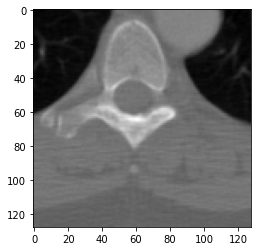

In [8]:
# Draw the image in grayscale
plt.imshow(im_ct, cmap='gray')

# Render the image
plt.show()

### Exercise 2
Plot the CT scan and investigate the effect of a few different parameters, e.g. try the `rainbow` colormap. Also, set a range from -200 to 200 to increase the contrast.

In [17]:
# Write your code here (the solution is below)

















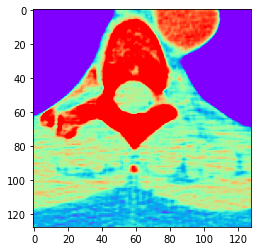

In [9]:
### Solution
# Draw the image with greater contrast (from -200 to 200)
plt.imshow(im_ct, cmap='rainbow', vmin=-200, vmax=200)

# Render the image
plt.show()

# Load volumes
`ImageIO's volread()` function can load multi-dimensional datasets and create 3D volumes from a folder of images. It can also aggregate metadata across these multiple images.

In [10]:
import imageio
print(imageio.__version__)
# Path to the folder containing the DICOM files
folder_path = 'Data/Brain/SE000001/MR000000'
import imageio as io
# Load the brain data folder
vol = io.volread(folder_path)
# Print image attributes (similar to pydicom)
print('Shape of image array:', vol.shape)

2.33.1
Reading DICOM (examining files): 1/27 files (3.7%27/27 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 27/27  (100.0%)
Shape of image array: (27, 256, 256)


## Slice 3D Images
The simplest way to plot 3D and 4D images by slicing them into many 2D frames. Plotting many slices sequentially can create a "fly-through" effect that helps you understand the image as a whole.

To select a 2D frame, pick a frame for the first slice and select all data from the remaining two: `vol[0, :, :]`.

Try to show more slices and experiment with it.

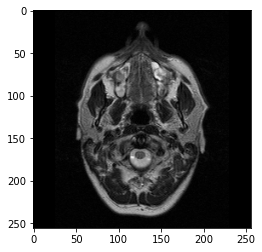

In [11]:
# Plot the first slice of the volume
plt.imshow(vol[0, :, :], cmap='gray')

# Render the image
plt.show()

Now we want to slice through the image in one direction:

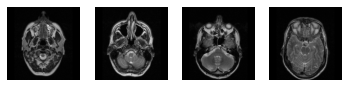

In [12]:
# Plot the images on a subplots array 
fig, axes = plt.subplots(nrows=1,ncols=4)

# Loop through subplots and draw image
# plot every 30th slice of vol on a separate subplot
for ii in range(4):
    im = vol[ii*3, :, :]
    axes[ii].imshow(im, cmap='gray')
    axes[ii].axis('off')
    
# Render the figure
plt.show()

## Plot Other Views
Any two dimensions of an array can form an image, and slicing along different axes can provide a useful perspective.

Changing the aspect ratio can address this by increasing the width of one of the dimensions.

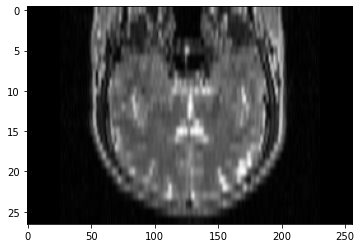

In [13]:
# Select coronal frame from "vol"
im1 = vol[:, 128, :]

# Compute aspect ratios
d0, d1, d2 = vol.meta['sampling']
asp1 = d0 / d2

# Plot the coronal image
plt.imshow(im1, cmap='gray', aspect=asp1)

plt.show()

### Exercise 3
Repeat what you have just learnt and plot the picture with respect to the sagittal axis.

In [ ]:
# Write your code here (the solution is below)














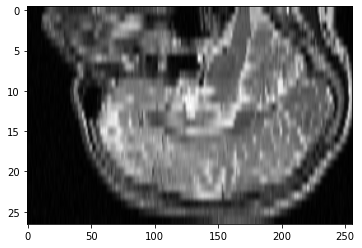

In [14]:
### Solution
# Select sagittal frame from "vol"
im2 = vol[:, : , 128]

# Compute aspect ratios
asp2 = d0 / d1

# Plot the sagittal image
plt.imshow(im2, cmap='gray', aspect=asp2)

plt.show()